In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np

# sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from analysis import *
import h2D

In [73]:
case = h2D.Case(
    # r"/users/mjk557/scratch/cases/compass/ca2b-lotimestep",
    r"/users/mjk557/scratch/cases/st40/a2c-lowerini",
    process = False,
    )

ds = xbout.load.open_boutdataset(
    datapath = case.datapath, 
    inputfilepath = case.inputfilepath, 
    # gridfilepath = r"/users/mjk557/scratch/cases/compass-36x48.grd.nc",
    gridfilepath = r"/users/mjk557/scratch/cases/st40-a1.nc",
    info = False,
    geometry = "toroidal",
    keep_xboundaries=True,
    keep_yboundaries=True,
    )


ds = ds.squeeze(drop = True)

/users/mjk557/.local/lib/python3.9/site-packages/boutdata/data.py:765: AlwaysWarning: While building x, y, z coordinate arrays, an exception occured: [Errno 2] No such file or directory: b'"st40-a1.nc"'
Evaluating non-scalar options not available
  alwayswarn(


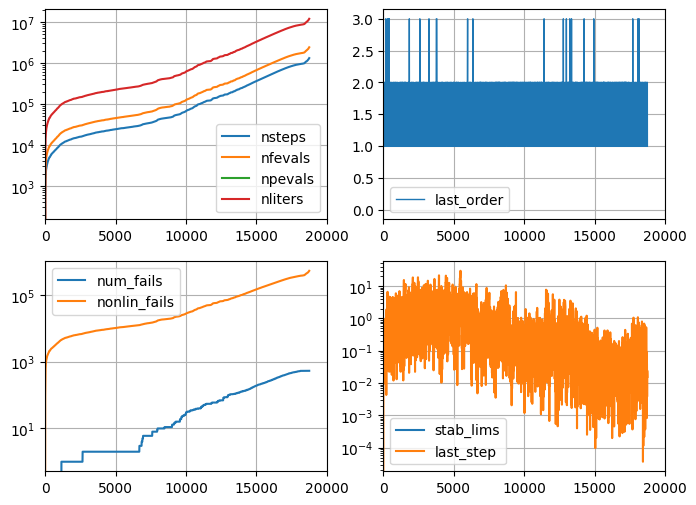

In [75]:
fig, axes = plt.subplots(2,2, figsize = (8,6))

scale = "log"
lims = (0,20000)

ax = axes[0,0];  ax.set_yscale(scale)
ax.plot(ds.coords["t"], ds.data_vars["cvode_nsteps"].values, label = "nsteps")
ax.plot(ds.coords["t"], ds.data_vars["cvode_nfevals"].values, label = "nfevals")
ax.plot(ds.coords["t"], ds.data_vars["cvode_npevals"].values, label = "npevals")
ax.plot(ds.coords["t"], ds.data_vars["cvode_nliters"].values, label = "nliters")

ax = axes[0,1]
ax.plot(ds.coords["t"], ds.data_vars["cvode_last_order"].values, label = "last_order", lw = 1)

ax = axes[1,0]; ax.set_yscale(scale)
ax.plot(ds.coords["t"], ds.data_vars["cvode_num_fails"].values, label = "num_fails")
ax.plot(ds.coords["t"], ds.data_vars["cvode_nonlin_fails"].values, label = "nonlin_fails")

ax = axes[1,1]; ax.set_yscale(scale)
ax.plot(ds.coords["t"], ds.data_vars["cvode_stab_lims"].values, label = "stab_lims")
ax.plot(ds.coords["t"], ds.data_vars["cvode_last_step"].values, label = "last_step")

for i in range(2):
    for j in range(2): 
        axes[i,j].grid()
        axes[i,j].legend()
        if lims != (0,0):
            axes[i,j].set_xlim(lims)